## Github link
Github repo for this project can be found here: https://github.com/n-cambria/MSDS_5510_BBC/tree/main

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Part 1: Loading and EDA

In [2]:
# load files into dataframes
sol = pd.read_csv(
    r"C:\Users\nickc\Documents\School\DSTA\5510 unsupervised learning\learn-ai-bbc\BBC News Sample Solution.csv")
train = pd.read_csv(
    r"C:\Users\nickc\Documents\School\DSTA\5510 unsupervised learning\learn-ai-bbc\BBC News Train.csv")
test = pd.read_csv(
    r"C:\Users\nickc\Documents\School\DSTA\5510 unsupervised learning\learn-ai-bbc\BBC News Test.csv")

### First, we'll view the basic structure, size, and number of missing values in the training and test sets:

In [3]:
print(f"Training set has {len(train)} entries; NaN counts: \n {train.isnull().sum()}")
display(train)
print(f"Test set has {len(test)} entries; NaN counts: \n {test.isnull().sum()}")
display(test)

Training set has 1490 entries; NaN counts: 
 ArticleId    0
Text         0
Category     0
dtype: int64


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


Test set has 735 entries; NaN counts: 
 ArticleId    0
Text         0
dtype: int64


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


### Now, let's get a general idea of the proportional representation of article categories in the training set:

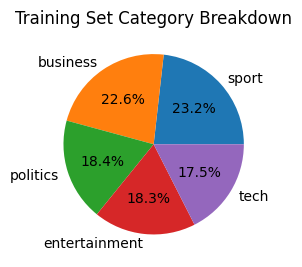

In [4]:
train_counts = train['Category'].value_counts(normalize=True)

plt.subplot(1,2,1)
plt.pie(train_counts, labels=train_counts.index, autopct='%1.1f%%')
plt.title('Training Set Category Breakdown')
plt.show()

We see from this chart that the categories are more or less equally represented.  The greatest proportion is that of sports articles, which only encompass 5.7\% more of the present articles than the least represented category, technology.

### I'd like to see the breakdown of wordcounts by category in the training set, and the histograms of wordcounts in both the training and test sets:

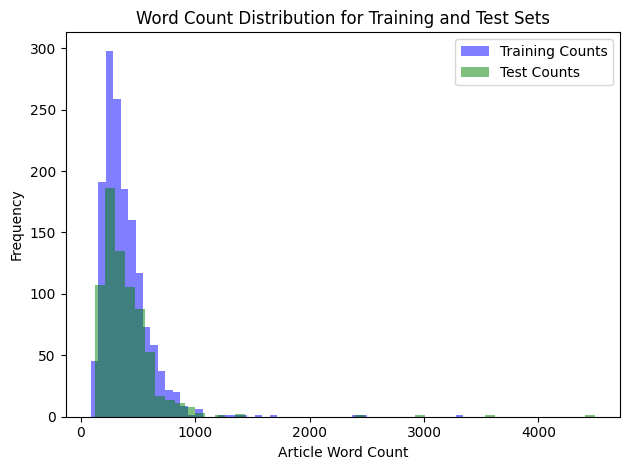

In [5]:
train_words = [len(w.split()) for w in train['Text']]
test_words = [len(w.split()) for w in test['Text']]

plt.hist(train_words, bins=50, alpha=0.5, label='Training Counts', color = 'blue')
plt.hist(test_words, bins=50, alpha=0.5, label='Test Counts', color = 'green')
plt.title("Word Count Distribution for Training and Test Sets")
plt.xlabel("Article Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


Unsurprisingly, the training set and the testing set appear to have very comparable distributions in word count.  This gives us confidence that a model trained on the training set would accurately predict values for the testing set.  Let's now assess the word count by category within the training set.  This may not serve to be interesting, but we may as well just in case.

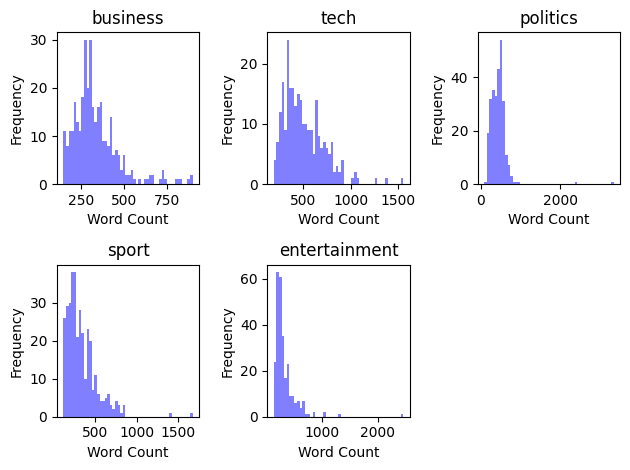

In [6]:
train_cats = train['Category'].unique()
rows = 2
cols = 3
for i, c in enumerate(train_cats, 1):
    plt.subplot(rows, cols, i)
    words = train.loc[train['Category'] == c, 'Text'].apply(lambda x: len(x.split()))
    plt.hist(words, bins=50, color='blue', alpha = 0.5)
    plt.title(c)
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.tight_layout()

These distributions by category look more or less comparable; politics and entertainment articles are definitely shorter on average than the other categories, but not to an extent that seems noteworthy at this point.  This may change as models are trained.

### Let's now perform word embedding using TF-IDF
TF-IDF is a word embedding method which compares the frequency of a given word within a particular article to the total prevalence in all of the available articles.  Words which are rare overall end up with a higher score.

In [19]:
# both training and test sets will be embedded now for later model evaluation

X_train_text, X_val_text, y_train, y_val = train_test_split(
    train['Text'], train['Category'], test_size=0.2, random_state=10)

tf = TfidfVectorizer(max_features=10000, stop_words='english')
X_train = tf.fit_transform(X_train_text)
X_val = tf.transform(X_val_text)

We can now view some embeddings of words starting with the letter 'a':

In [20]:
a_words = [(j, k) for j, k in zip(tf.get_feature_names_out(), tf.idf_) if j.lower().startswith('a')]

i = 0
print("Excerpt of 'a' word embeddings: \n")

for j, k in a_words:
    print(j, ':', k)
    i += 1
    if i == 20:
        break

Excerpt of 'a' word embeddings: 

a320 : 6.697932060978025
aaa : 6.474788509663815
aac : 7.3910792415379705
aaliyah : 7.3910792415379705
abandoned : 6.138316273042602
abandoning : 6.697932060978025
abba : 6.985614133429807
abbas : 6.697932060978025
abbasi : 6.985614133429807
abbott : 6.292466952869861
abc : 6.004784880418081
aberdeen : 6.474788509663815
abiding : 6.474788509663815
ability : 4.113934508545794
able : 3.1006198003895795
abolish : 6.138316273042602
abolishing : 6.474788509663815
abortion : 6.292466952869861
abortionist : 6.292466952869861
abroad : 4.865350597229716


# Part 2: Model Construction and Training

### We'll try with Non-negative Matrix Factorization first;
Non-negative Matrix Factorization involves decomposing the input matrix into its underlying features and their respective weights.  By doing so, we can then inspect the features for underlying relationships, and then map those relationships back to our original input matrix.  We'll use logistic regression to audit the matrix's label assignment.

NMF method accuracy on training set: 0.6879194630872483
Confusion matrix for NMF:


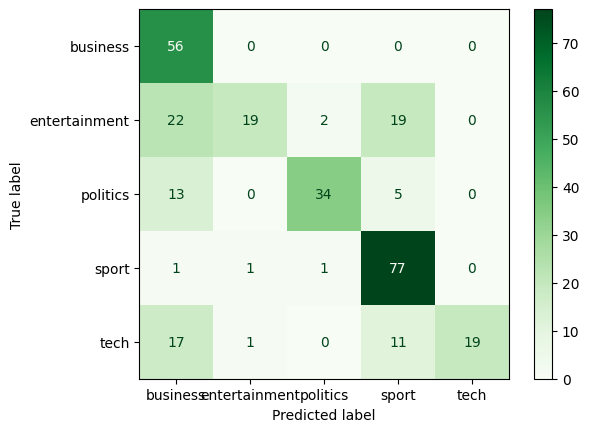

In [23]:
# first using Non-negative Matrix Factorization

nmf = NMF(n_components=100, random_state=10)
train_nmf = nmf.fit_transform(X_train)
val_nmf = nmf.transform(X_val)

logreg = LogisticRegression(max_iter=10000)

logreg.fit(train_nmf, y_train)
nmf_preds = logreg.predict(val_nmf)
nmf_acc = accuracy_score(y_val, nmf_preds)
nmf_conf = confusion_matrix(y_val, nmf_preds)
print(f"NMF method accuracy on training set: {nmf_acc}")
print("Confusion matrix for NMF:")
ConfusionMatrixDisplay(nmf_conf, display_labels=logreg.classes_).plot(cmap='Greens')
plt.show()

Our NMF methodology returned fairly good results, scoring an accuracy of ~69%.

### Now we'll compare to Truncated SVD
SVD is a generalized form of finding eigenvalues in a more abstract matrix space.  Doing so gives insight into which components of the original matrix are 'fixed' or minimally transformed.  From this, we can determine the underlying structure of the input matrix.  Again, we'll use our generic logistic regression model to map back to the labels for accuracy assessment.

SVD method accuracy on training set: 0.9630872483221476
Confusion matrix for SVD:


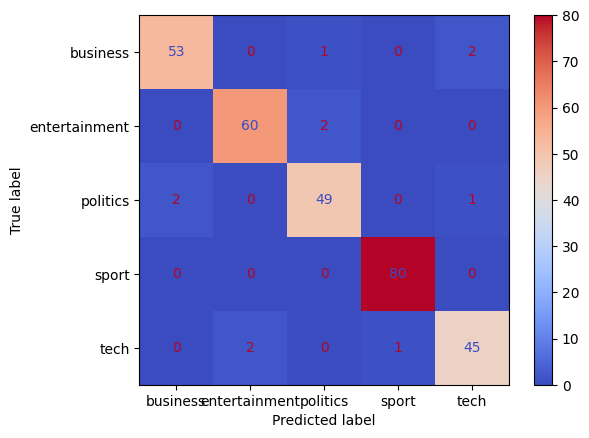

In [29]:
# now using SVD

svd = TruncatedSVD(n_components=100, random_state=10)
train_svd = svd.fit_transform(X_train)
val_svd = svd.transform(X_val)

logreg.fit(train_svd, y_train)
svd_preds = logreg.predict(val_svd)
svd_acc = accuracy_score(y_val, svd_preds)
svd_conf = confusion_matrix(y_val, svd_preds)
print(f"SVD method accuracy on training set: {svd_acc}")
print("Confusion matrix for SVD:")
ConfusionMatrixDisplay(svd_conf, display_labels=logreg.classes_).plot(cmap='coolwarm')
plt.show()

Our SVD attempt was far better than our NMF version, scoring an impressive 96% accuracy.

### Now we'll run our SVD model on the 'test' dataset which currently lacks categories for submittal to kaggle

In [35]:
X_test = tf.transform(test['Text'])
svd_test = svd.transform(X_test)
test_preds = logreg.predict(svd_test)

output = pd.DataFrame({
                'ArticleId': test['ArticleId'],
                'Category': test_preds})
output.head()
# output.to_csv(r"C:\Users\nickc\Documents\School\DSTA\5510 unsupervised learning\wk4 kaggle submit.csv", index=False)

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport


After submitting this output to the kaggle competition, this model scored an accuracy of 0.96870 on the test data.

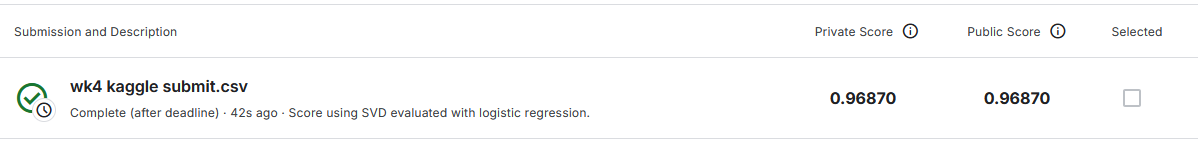

# Part 3: Comparison to a Pure Supervised Model

### We'll compare our SVD results to that of a Naive Bayes supervised model

In [39]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive.fit(X_train, y_train)
naive_preds = naive.predict(X_val)
naive_acc = accuracy_score(y_val, naive_preds)

print(f"Accuracy of supervised Naive Bayes: {naive_acc}")

Accuracy of supervised Naive Bayes: 0.9765100671140939


Despite the impressive score of our SVD model, the basic Naive Bayes model still beats it by 1.5%.  This is not surprising given the task; Naive Bayes is very efficient at intuiting relationships on small datasets while SVD has to learn coincidence of features which may require many such features.  Further, Naive Bayes is regularized, which helps prevent overfitting.  The dense matrix formed via SVD can sometimes be prone to overfitting as it may pick up some noise in the data and interpret it as a meaningful relationship in the input in error.

Though the SVD model was novel, and surprisingly effective, the accuracy scores show that the supervised approach is still better overall for labeled data such as this.

# References

GeeksforGeeks. (n.d.). Non-negative matrix factorization. GeeksforGeeks. Retrieved October 7, 2025, from https://www.geeksforgeeks.org/machine-learning/non-negative-matrix-factorization/

GeeksforGeeks. (2025, August 13). Understanding TF-IDF (Term Frequency-Inverse Document Frequency). GeeksforGeeks. Retrieved October 7, 2025, from https://www.geeksforgeeks.org/machine-learning/understanding-tf-idf-term-frequency-inverse-document-frequency/

Scikit-learn developers. (n.d.). sklearn.feature_extraction.text.TfidfVectorizer. Scikit-learn. Retrieved October 7, 2025, from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

Sebastian, A. (2020, July 16). Text vectorization: Term Frequency-Inverse Document Frequency (TF-IDF). Towards Data Science. Retrieved October 7, 2025, from https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d/

Wikipedia contributors. (n.d.). Singular value decomposition. In Wikipedia. Retrieved October 9, 2025, from https://en.wikipedia.org/wiki/Singular_value_decomposition